C:\Users\singa\AppData\Local\Temp\ipykernel_17360\3479758649.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('pass_data.csv', on_bad_lines='skip')


      password strength Unnamed: 2 Unnamed: 3  Unnamed: 4 Unnamed: 5  \
0     kzde5577        1        NaN        NaN         NaN        NaN   
1     kino3434        1        NaN        NaN         NaN        NaN   
2    visi7k1yr        1        NaN        NaN         NaN        NaN   
3     megzy123        1        NaN        NaN         NaN        NaN   
4  lamborghin1        1        NaN        NaN         NaN        NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
(669879, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669879 entries, 0 to 669878
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   password    669878 non-null  object 
 1   strength    669879 non-null  object 
 2   Unnamed: 2  236 non-null     object 
 3   Unnamed: 3  239 non-null     object 
 4   Unnamed: 4  238 non-null     float64
 5   Unnamed: 5  1 non-null       object 
 6   Unnamed:

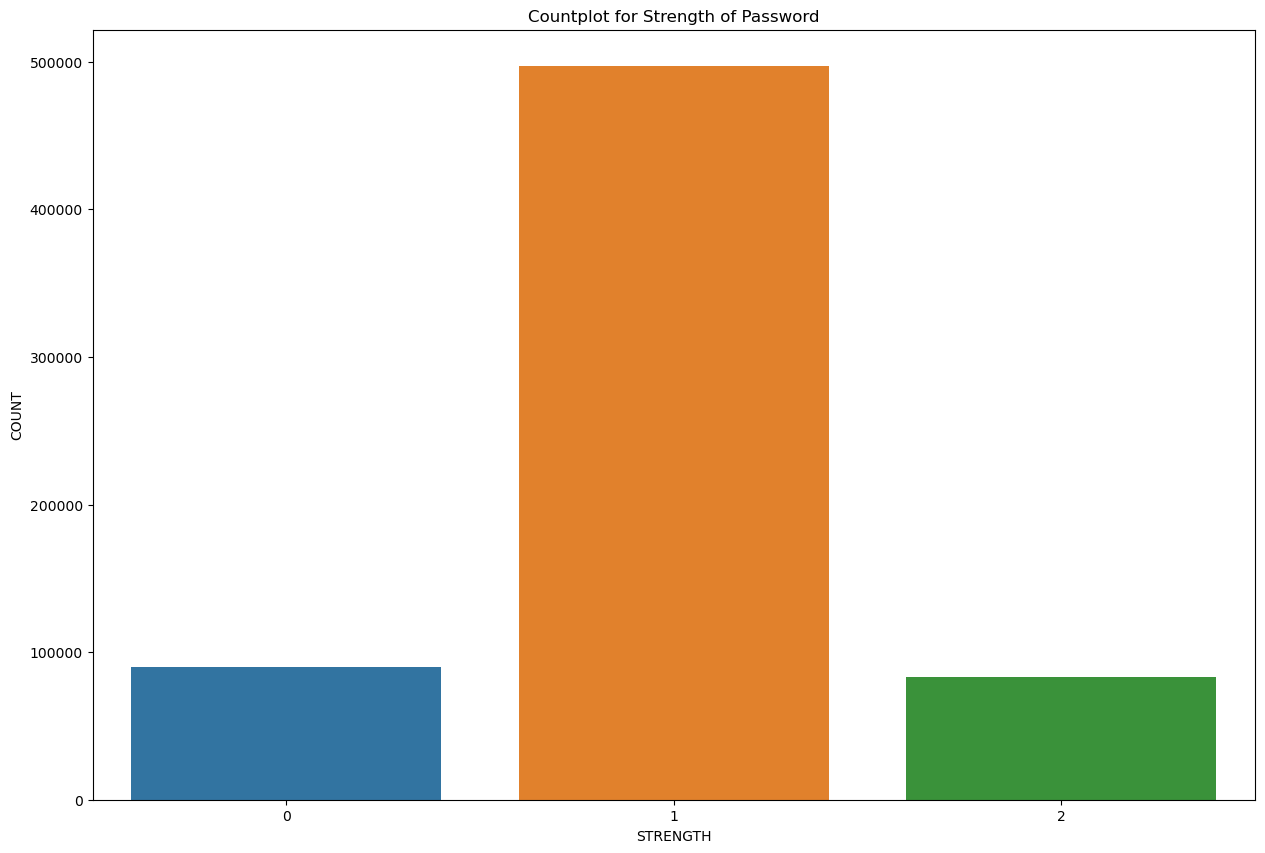

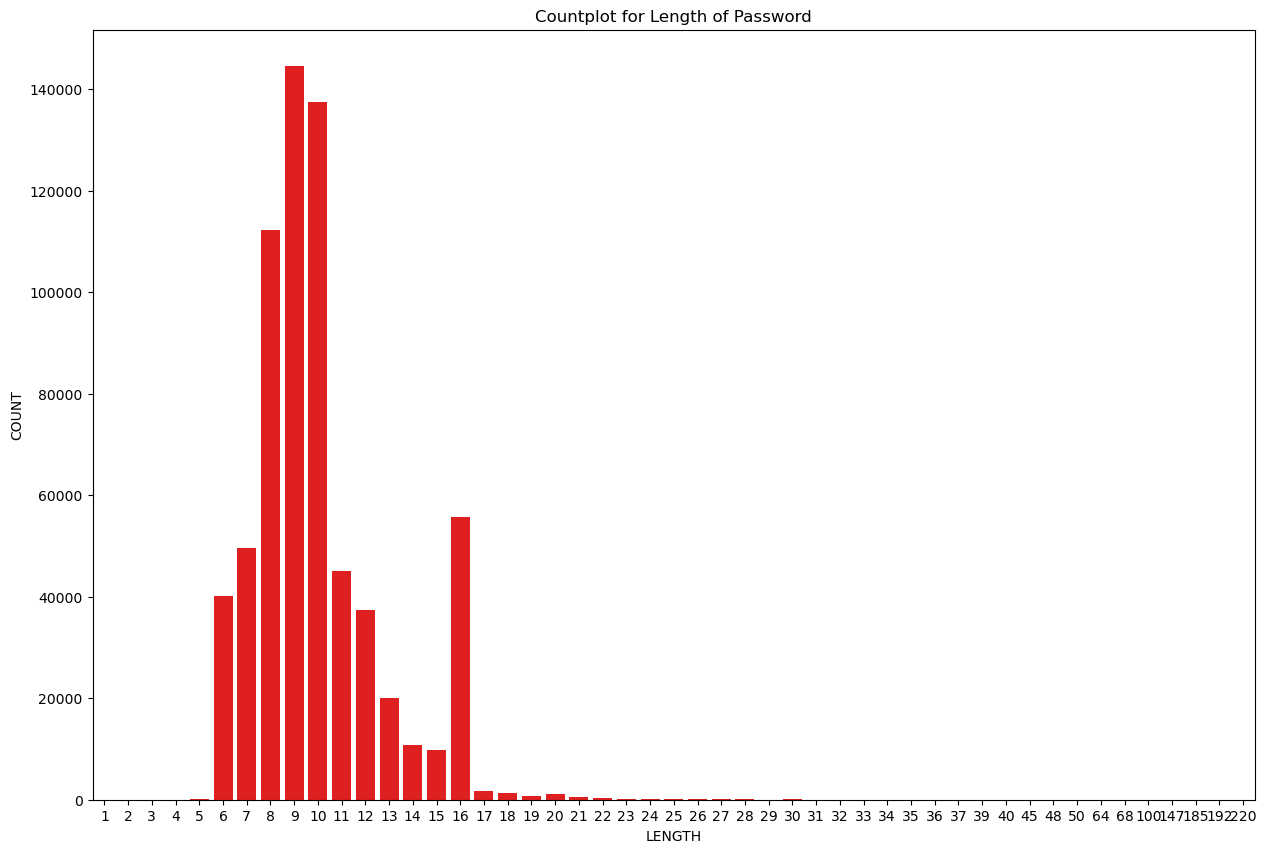

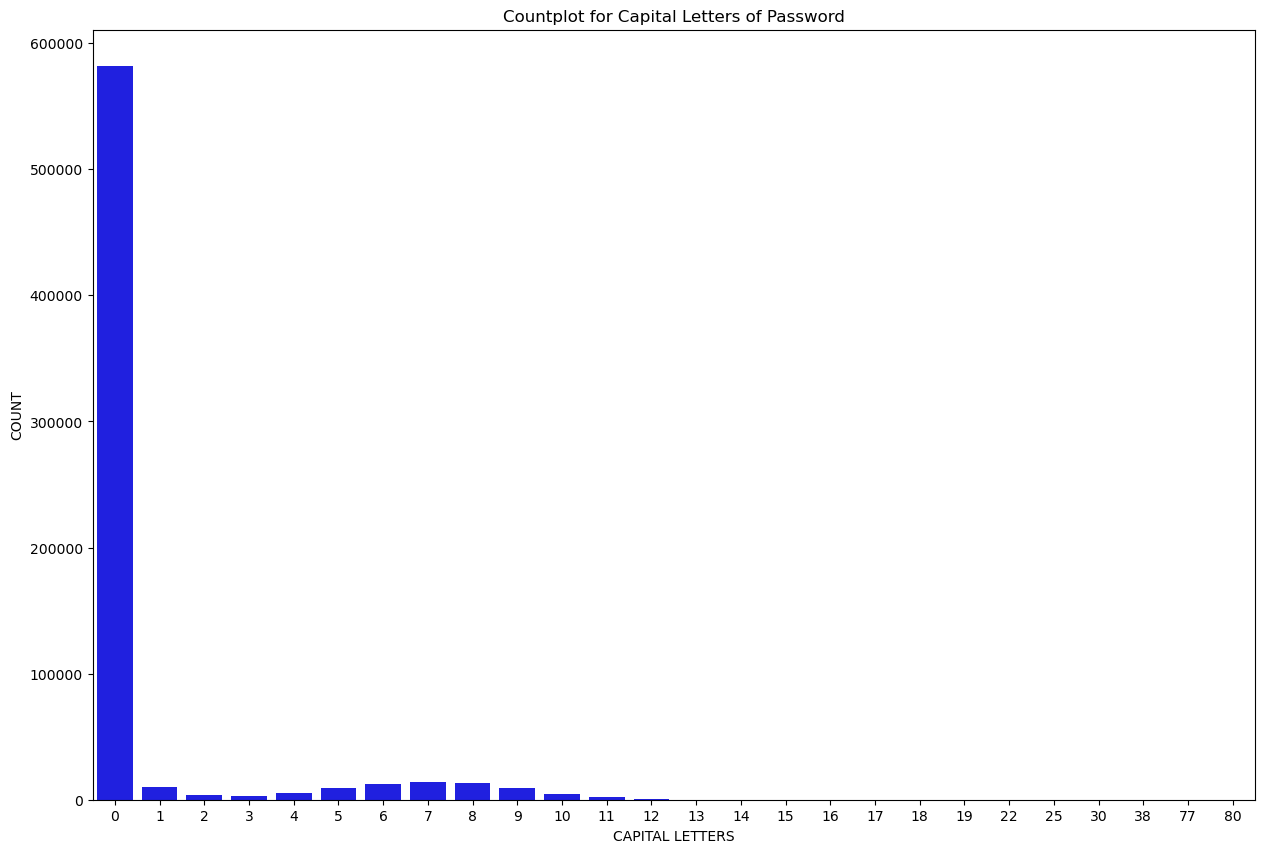

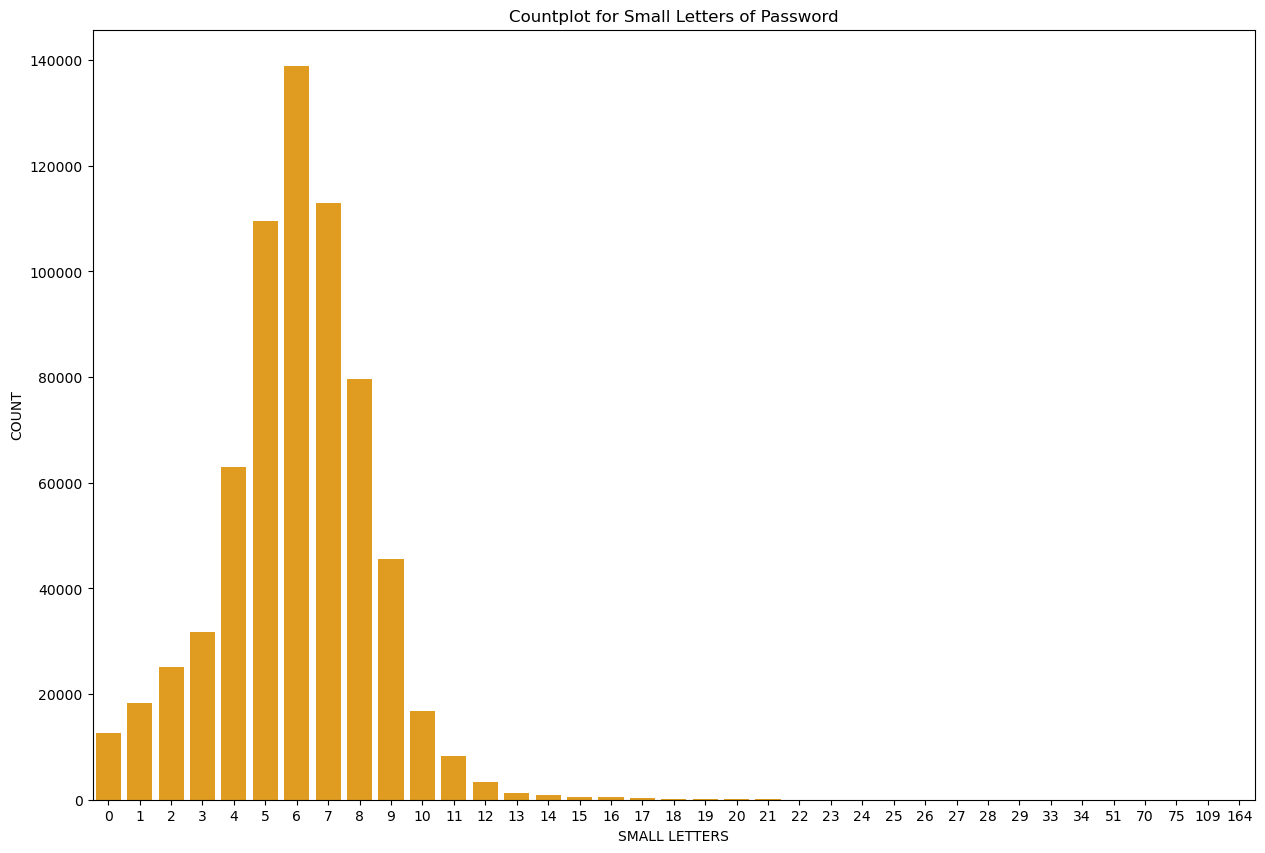

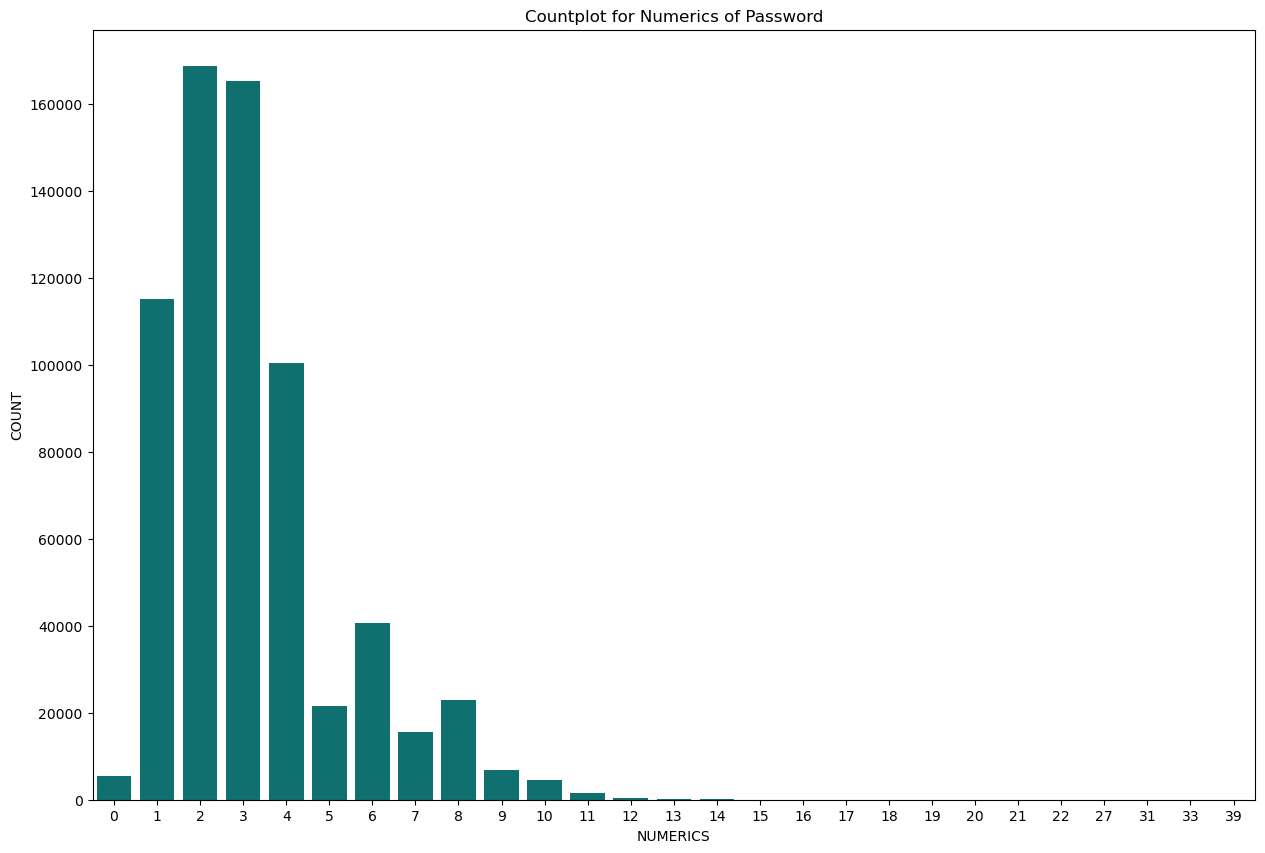

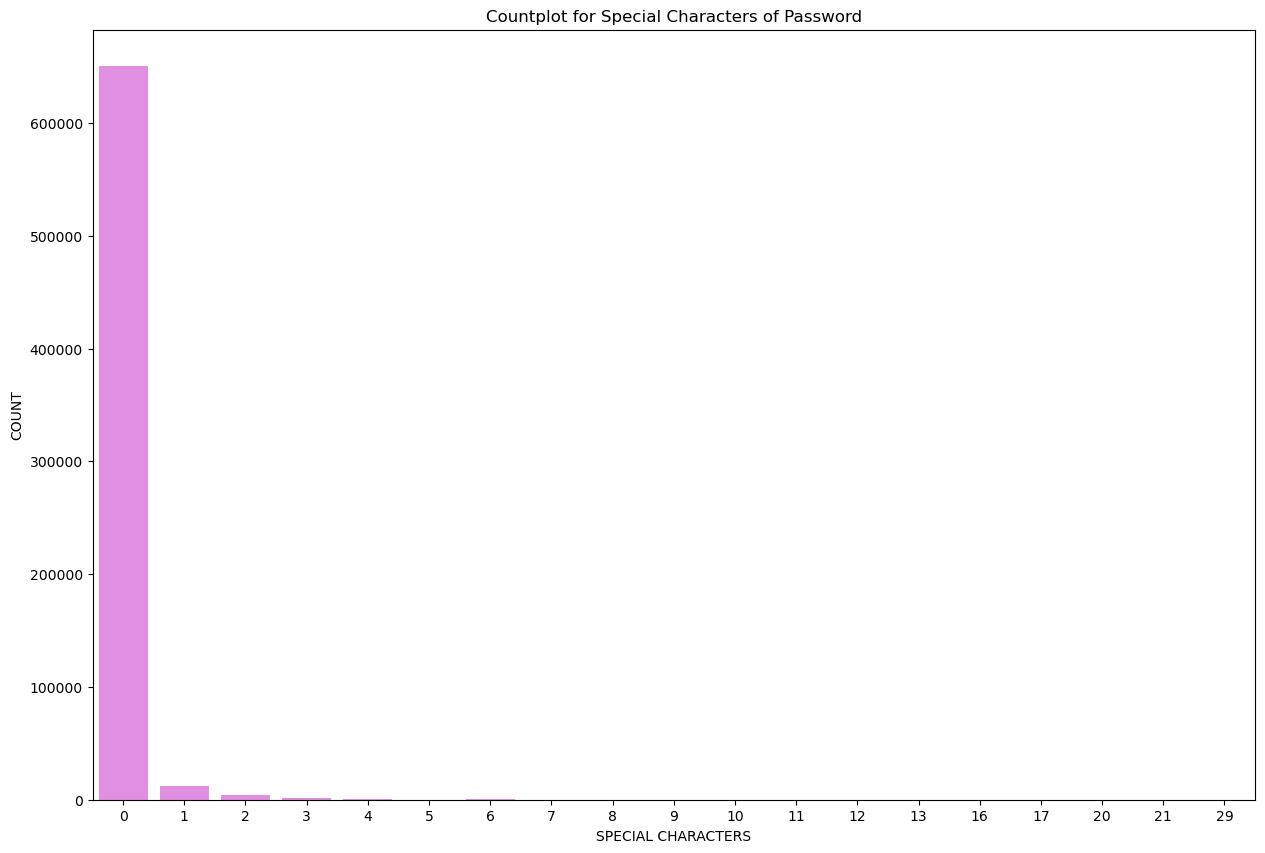

In [5]:
# Password EDA and Feature Engineering

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data
data = pd.read_csv('pass_data.csv', on_bad_lines='skip')

# Display the first five elements of the data
print(data.head())

# Display the shape of the data
print(data.shape)

# Display information about the data
print(data.info())

# Display the description of the data
print(data.describe())

# Drop unnecessary columns
data = data[['password', 'strength']]

# Display the shape of the data after dropping columns
print(data.shape)

# Remove rows with invalid strength values
valid_strengths = ['0', '1', '2']
data = data[data['strength'].isin(valid_strengths)]

# Convert strength column to integer
data['strength'] = data['strength'].astype(int)

# Drop rows with null values
data = data.dropna(axis=0)

# Display the shape of the data after cleaning
print(data.shape)

# Plot the count of each password strength
plt.figure(figsize=(15, 10))
sns.countplot(x=data['strength'])
plt.title('Countplot for Strength of Password')
plt.xlabel('STRENGTH')
plt.ylabel('COUNT')
plt.savefig('strength.jpg')
plt.show()

# Add feature engineering
data['password'] = data['password'].astype(str)

# Length of passwords
data['length'] = data['password'].apply(lambda x: len(x))

# Count of capital letters in passwords
data['capital'] = data['password'].apply(lambda x: sum(1 for i in x if i.isupper()))

# Count of small letters in passwords
data['small'] = data['password'].apply(lambda x: sum(1 for i in x if i.islower()))

# Count of numeric characters in passwords
data['numeric'] = data['password'].apply(lambda x: sum(1 for i in x if i.isdigit()))

# Count of special characters in passwords
data['special'] = data['password'].apply(lambda x: sum(1 for i in x if re.match(r'[^a-zA-Z0-9]', i)))

# Plot count of lengths of passwords
plt.figure(figsize=(15, 10))
sns.countplot(x=data['length'], color='red')
plt.title('Countplot for Length of Password')
plt.xlabel('LENGTH')
plt.ylabel('COUNT')
plt.savefig('length.jpg')
plt.show()

# Plot count of capital letters in passwords
plt.figure(figsize=(15, 10))
sns.countplot(x=data['capital'], color='blue')
plt.title('Countplot for Capital Letters of Password')
plt.xlabel('CAPITAL LETTERS')
plt.ylabel('COUNT')
plt.savefig('capital.jpg')
plt.show()

# Plot count of small letters in passwords
plt.figure(figsize=(15, 10))
sns.countplot(x=data['small'], color='orange')
plt.title('Countplot for Small Letters of Password')
plt.xlabel('SMALL LETTERS')
plt.ylabel('COUNT')
plt.savefig('small.jpg')
plt.show()

# Plot count of numeric characters in passwords
plt.figure(figsize=(15, 10))
sns.countplot(x=data['numeric'], color='teal')
plt.title('Countplot for Numerics of Password')
plt.xlabel('NUMERICS')
plt.ylabel('COUNT')
plt.savefig('numerics.jpg')
plt.show()

# Plot count of special characters in passwords
plt.figure(figsize=(15, 10))
sns.countplot(x=data['special'], color='violet')
plt.title('Countplot for Special Characters of Password')
plt.xlabel('SPECIAL CHARACTERS')
plt.ylabel('COUNT')
plt.savefig('special.jpg')
plt.show()

# Save the processed dataset to the local disk
data.to_csv('processed.csv', index=None)
